# **データ分析入門**

# **【 分析実践 : pandas 】**

## **データを貰ったらまずは**
  


本項目では、[独立行政法人統計センター](https://www.nstac.go.jp/use/literacy/ssdse/)が作成・公開している統計データ SSDSE（教育用標準データセット）のうち、  
「47都道府県 × 男女別 × 社会生活119項目」が収録されている**SSDSE-社会生活**データ `SSDSE-D-2021.csv` （以下 SSDSE-D ）を利用します。  

### **データを理解しよう**

SSDSE-D は、国民の社会生活について調査した統計データです。  
データの詳細は提供元の[ドキュメント](https://www.nstac.go.jp/sys/files/static/SSDSE/data/2021/kaisetsu-D-2021.pdf)を読むことで確認することができます。

ます、先ほど準備した CSV ファイルを *Excel* か *Googleスプレッドシート* で開いてみましょう。

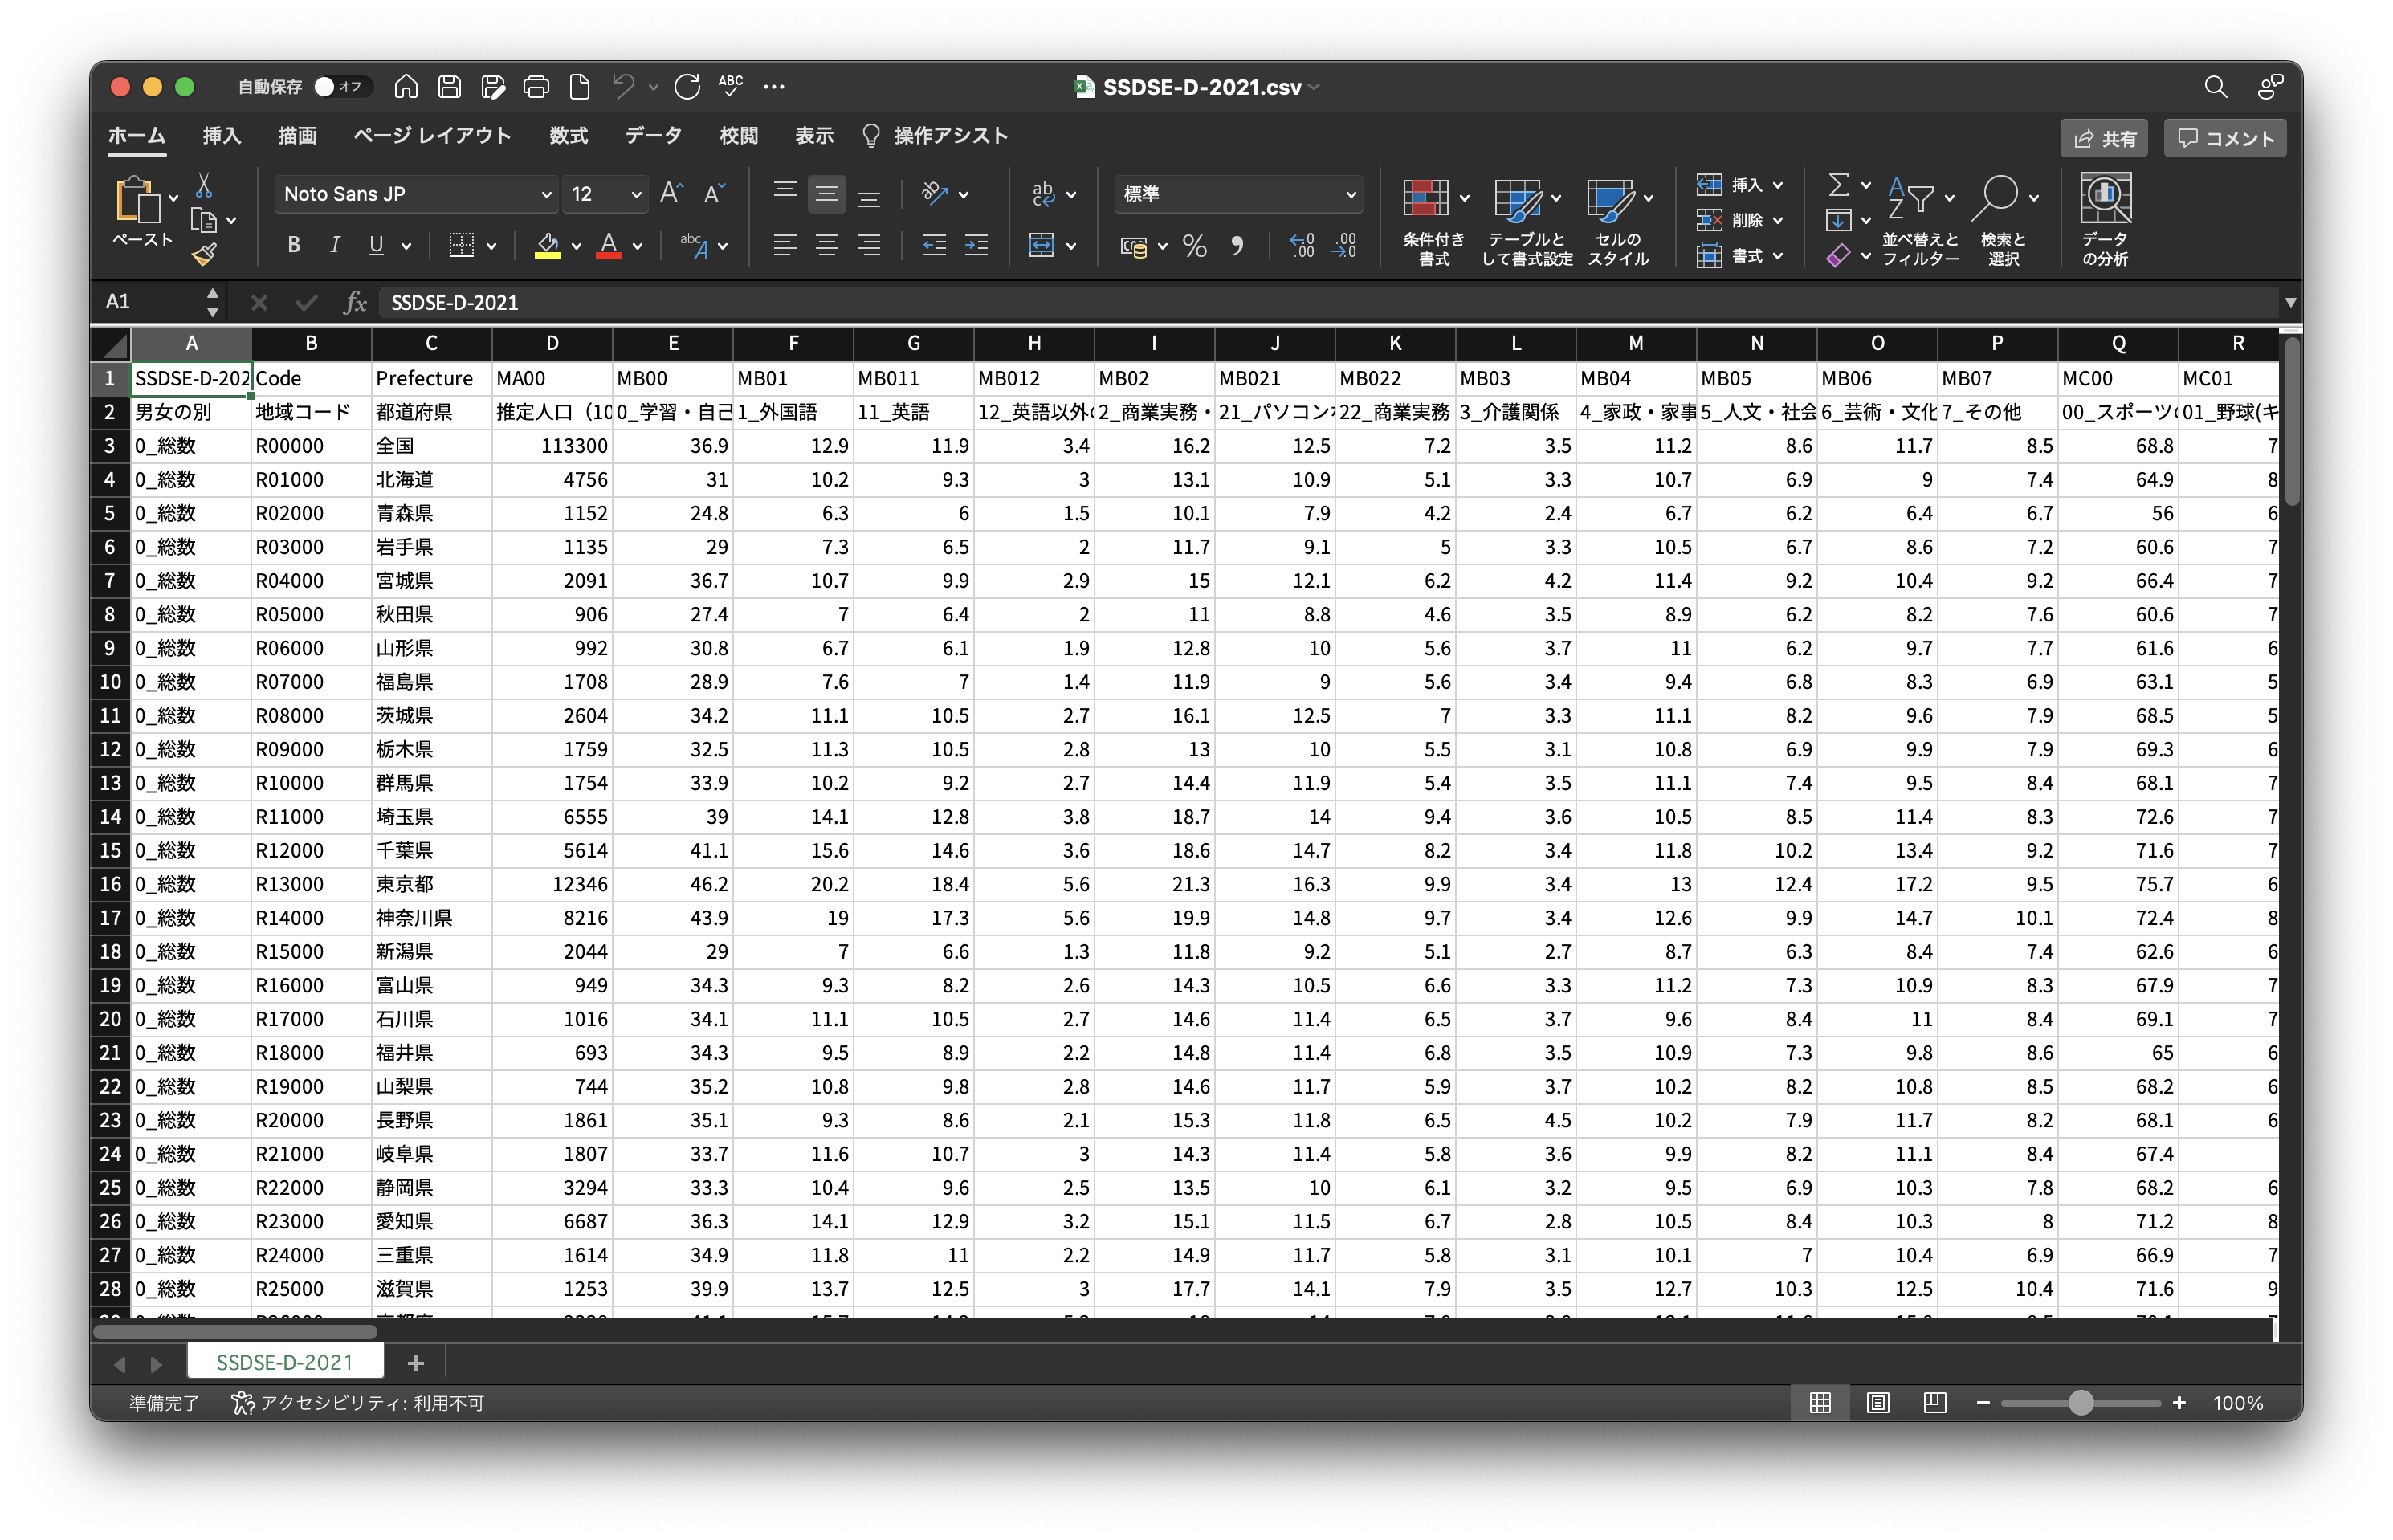

この状態でもデータの閲覧・操作は可能ですが、毎回ファイルを開くことは大変であることに加え

*   データの大きさによっては<font color="Red">開くこと自体に時間がかかる</font>
*   ここで操作すると<font color="Red">元データが編集されてしまう</font>

といったデメリットも多く存在します。   

csvライブラリやnumpyといったライブラリを利用することでpythonでcsvファイルを開く方法も存在しますが、csvデータを分析することに特化したライブラリとして **pandas** というライブラリが存在しています。

#### **pandas の準備**

Python には **pandas** と呼ばれるデータ解析のためのライブラリが用意されているため、これを利用します。

これ以降、`pd` を利用することで pandas 内の関数を使用することができます。

#### **DataFrame クラスでデータを用意する**

pandas には **DataFrame** というエクセルデータの様なクラスが用意されています。  

先ほど用意したデータを DataFrame として読み込んでみましょう。  

`pd.read_csv()` を利用して CSV ファイルを Dataframe として読み込んだものを変数 `raw_data` に格納しています。  
関数 `pd.read_csv()` については以下の通りです。

```
pd.read_csv( filepath_or_buffer, encoding, header )  
 - filepath_or_buffer: 読み込みたいファイルのパス
 - encoding: 文字コードの指定
      デフォルトでは 「UTF-8」 となっていますが、今回は文字化けを回避するため 「shift-jis」 を指定します。
 - header: ヘッダーとする行番号の指定
       エクセルなどで開くと先頭行が項目名（英語）、次の行が項目名（日本語）となっていることがわかります。
       今回は2行目をヘッダー行とするため 「1」 を指定します。
```
> pandas 公式ドキュメント : [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

このようにデータを読み込むことで、元の CSV データを変更せずに様々な操作をすることが可能になりました。  
確認のため変数 `raw_data` のデータ型が Dataframe となっているか見てみましょう。



In [ ]:
# raw_data のデータ型を確認


#### **DataFrame の基本操作**

それでは実際にデータを確認していきましょう。  

まずはデータを先頭からいくつか表示してみます。  
DataFrame データの持つ `.head()` メソッドでは、先頭から指定した行数を表示することができます。

In [ ]:
# raw_data の先頭から3行分のデータを表示


また、DataFrame でも　numpy.ndarrayと同様に `.shape` 属性を利用して配列の形状を参照することが可能です。

In [ ]:
# raw_data の配列形状を表示


上記のコードから `raw_data` は **`144`行 `122`列**であることがわかりました。

<br>

次に `raw_data` の持つカラムを確認してみましょう。  
データにおける **カラム** とは、列名のことを指します。  
カラムは `.columns` 属性を利用して参照することが可能です。

In [ ]:
# raw_data カラムを表示


In [ ]:
# 表示を整える


カラムを観察することで `raw_data` のデータが 「 *人々の社会生活の統計データを集めたもの* 」 であることがわかりました。

<br>

最後に `raw_data` の持つレコード数を確認してみましょう。  
**レコード**とは、テーブルデータ（表）における1行分のデータを指します。  
レコード数はテーブルデータの行数に等しいため、関数 `len()` によって調べることができます。


In [ ]:
# レコード数（行数）の確認


SSDSE-D の[ドキュメント](https://www.nstac.go.jp/sys/files/static/SSDSE/data/2021/kaisetsu-D-2021.pdf)によると、「全国+47都道府県」のセットを総数・男・女ごとに3セット並列したデータとなっているために  
48 × 3 ( =144 ) レコード、すなわち 144 個のデータとなっているようです。

実際に 「男女の別」 というカラムを確認してみましょう。  
DataFrame では以下のようにカラム名を指定して特定の列のみを抽出することができます。

In [ ]:
# カラム"男女の別"の列だけ取り出し


1要素につき 48 セット存在するため、このままでは 「総数・男・女」 のセットがあることを確認しづらくなっています。  
`.unique()` メソッドを利用して重複する要素を取り除いて出力してみましょう。

In [ ]:
# カラム"男女の別"の列にどのような値があるかを確認


「男女の別」 というカラムには 「総数・男・女」 という3つの値があることが確認できました。

### **データを整形しよう**

前項により SSDSE-D がどういった構造のデータかなんとなくわかりました。  
次はこれを見やすい形に整形していきましょう。

#### **インデックス（索引）を設定しよう**

現在のデータではレコードに対して上から順に 0, 1, 2, ... と番号が割り振られていますが、この番号を**インデックス**と呼びます。  
現在はただのレコード番号でしかないため、インデックスとして扱いやすいものを割り当ててみましょう。  

SSDSE-D は 「各都道府県の男女別データ」 であることが先ほど確認できました。  
よって、都道府県の名前をインデックスとしましょう。地域コードでも良いかもしれません。

この操作は `.set_index()` メソッドによって可能です。

In [ ]:
# raw_data のインデックスを変更した結果を変数 df へ格納


# 確認


#### **データを分割しよう**

条件を基にして特定のデータを抽出しましょう。

現在の状態では総数・男・女でレコードが並列されているために扱いづらくなっています。  
カラム `'男女の別'` の列の、要素が `'0_総数'`, `'1_男'`, `'2_女'` となっているレコードごとに分割しましょう。

`df[条件]`の形で指定してやることで条件を満たすレコードのみを抽出できます。

In [ ]:
# データ df のうちカラム "男女の別" の要素が "x_xx" であるものだけ抜き出したものを df_xxx という変数に格納


# 確認（ 男女の別：総数 ）


DataFrame データ `df` に対して操作を行う場合、<font color="Red">元の `df` は変更されない</font>ため、<font color="Red">新しい変数を用意し代入する必要があります</font>。  
これは「元データを変更してしまわない」という pandas の設計思想による仕様となります。


データ整形がうまくいかない際はこの仕様の影響が考えられるため、この辺りを確認してみると良いかもしれません。

In [ ]:
# 元 df が変更されないことの確認
# df を操作（女性のレコードのみ抜き出し）
# 変数に格納する操作が無い場合、操作後の状態は保存されない（出力結果に "0_総数" のレコードが存在している）

#### **不要箇所を削除しよう**

今回は都道府県別でデータを確認したいため、インデックスが`"全国"`であるレコードは削除してしまいましょう。

データの削除は `.drop()` メソッドで実行することができます。  
```
.drop( labels, axis, index, columns ):
 - labels: 削除するインデックス / 列のラベル名
 - axis: 削除する軸
      引数 labels で指定されたラベルについて、0 / index でインデックスを、 1/ columns で列を削除する
```
> pandas 公式ドキュメント : [pandas.drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

インデックスが`"全国"`であるレコードを削除するため、引数`labels`は`"全国"`、引数`axis`は`0`となります。

In [ ]:
# インデックス: 全国 のレコードを削除


また、データはカラム `"男女の別"` に合わせて分割したこと、カラム `"地域コード"` はカラム`"都道府県"` と等しいことから  
これらも削除して良さそうです。  
カラムは列方向のデータであるため、引数`axis`は`1`となります。

### **データを抽出しよう**

#### **データ抽出の基礎**

まずは「東京都」のデータ1行分だけを抜き出して表示しましょう。  

データの抽出は `.loc` 属性、 `.iloc` 属性にて実行することができます。  
`.loc` 属性では**インデックス, カラムの名称**を利用するのに対し、`.iloc` 属性では**インデックス, カラムの番号**によって抽出範囲を決定します。

> pandas 公式ドキュメント : [pandas.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html), [pandas.iloc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)

In [ ]:
# .iloc 属性（行番号）による抽出


異なる方法ですが同じ出力が得られました。

次に「東京都での平均起床時間」を見てみましょう。  
今度はインデックスだけでなくカラムも指定します。

In [ ]:
# .loc 属性（行名）による抽出


In [ ]:
# .iloc 属性（行番号）による抽出


今度は「都道府県ごとの平均起床時間」を見てみましょう。  
先程までは *単一インデックス指定 × 単一カラム指定* でしたが、今回は *複数インデックス指定 × 複数カラム指定* となります。  
このような指定には **スライス操作** を利用します。

In [ ]:
# .loc 属性（行名）による抽出


In [ ]:
# .iloc 属性（行番号）による抽出


最後に都道府県ごとのデータから複数項目を抜き出してみましょう。

In [ ]:
# .loc 属性（行名）による抽出


In [ ]:
# .iloc 属性（行番号）による抽出


ちなみに、データ分割した際と同じ様に代入することでデータの一部分を新たなDataFrameとして保存することが可能です。

#### **データ抽出応用編**

ここまでは主にインデックス・カラムを参照してデータを抽出してきました。  
ここからはデータの値を条件にしたデータ抽出を行ってみましょう。

データを分割した際には`"男女の別"`のカラムのデータが持つ3つの値（総数・男・女）を利用して抽出を行いましたが、  
データの持つ値が **数値** である場合、「 $>, <, \geq, \leq$ 」 などを利用してデータを抽出することができます。  

<br>

これを利用して、「*推定人口(10歳以上)が5,000,000人以上の都道府県*」を見てみましょう。  

ここで、カラム`"推定人口（10歳以上）"`の単位は `[千人]` であることに留意してください。  
また、都道府県の名称はインデックスとして格納されているため、DataFrame のインデックスを参照する `.index` 属性によって確認します。




In [ ]:
# 推定人口(10歳以上)が5,000,000人以上の都道府県を取得


次に、「*推定人口(10歳以上)が5,000,000人未満の都道府県のうち、通勤・通学（通勤・通学をした人、平日）の時間が100分を超える都道府県はあるか*」を見てみましょう。  

この条件に当てはまる都道府県を探すには以下の条件を組み合わせる必要があります。
1.   カラム`"推定人口（10歳以上）"`の値 $<$ 5,000,000（人）
2.   カラム`"04_通勤・通学（通勤・通学をした人、平日）"`の値 $>$ 100（分）
3.   条件1、2を両方満たす

条件1、2に関しては先程のように、対象となるカラムの持つ数値と条件を比較します。  

条件3については「 &, |, ~ 」といったビット演算子を用いて表現します。  
今回は条件を両方満たしているものを探すため、`&` によって2つの条件を繋げましょう。

In [ ]:
# 推定人口(10歳以上)が5,000,000人未満の都道府県のうち、通勤・通学（通勤・通学をした人、平日）の時間が100分を超える都道府県を取得


このようにして、非常にさまざまな条件を設定してデータを抽出できることがわかりました。

<br>

最後に「*人口上位10都道府県*」を抜き出しましょう。  
まずデータを対象のカラムの要素が持つ値でソートし、その後上位10都道府県のみ抽出します。

DataFrame データのソートは `.sort_values()`メソッドにて行うことが可能です。  
`.sort_values()`メソッドについては以下の通りです。
```
sort_values(by, axis, ascending):
  - by: ソートのために参照するインデックスまたはカラムの名称
  - axis: ソートを実行する軸
      デフォルトでは0（カラム/列方向）、1を指定することでインデックス（行）方向に並べ替えることが可能
  - ascending: 昇順か降順か
      デフォルトでは True （昇順）、False を指定することで降順となる
```
> pandas 公式ドキュメント : [pandas.sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

それではデータを`"推定人口（10歳以上）"`でソートし、上から10個分をスライスで取り出しましょう。

In [ ]:
# 人口上位10都道府県


ついでに「*人口下位10都道府県*」も見てみましょう。  

以下の2つのコードは同じ結果を返すコードです。  
1つ目では人口を降順に並べて下から10個を抜き出していますが、2つ目では人口を昇順に並べて上から10個を抜き出す方法となっています。

In [ ]:
# 人口下位10都道府県 (人口の多さランキング38位〜47位)


In [ ]:
# 人口下位10都道府県(人口の少なさランキング1位〜10位)


## **DataFrameを使ったデータ分析**


ここまでで DataFrame を利用することでエクセルのような操作ができることがわかりました。  
しかし、真の目的はデータ分析です。  
ここからは DataFrame を利用したデータ分析を学んでいきましょう。

#### **要約統計量を計算しよう**

**要約統計量**とはデータの特徴を示す統計量の総称であり、平均値や分散といったものがこれに当たります。  
DataFrame の `.describe()` メソッドを利用することで対象データの要約統計量を取得することができます。  

実際に使ってみましょう。

In [ ]:
# 要約統計量の取得


各カラムについて要約統計量が計算されています。  
各行の意味については以下の通りです。

*   **count** :  カラムが持つデータ数
*   **mean** :  算術平均
*   **std** : 標準偏差
*   **min** : 最小値
*   **25%** : 1/4分位数
*   **50%** : 中央値
*   **75%** : 3/4分位数
*   **max** : 最大値

<br>

`.describe()` メソッドの出力も DataFrame であるため、これまでのようにしてデータを整形することが可能です。  
パソコンなどの情報処理を勉強している人の割合についての分析結果を抜き出してみましょう。

In [ ]:
# カラム "21_パソコンなどの情報処理" の要約統計量の取得


また、平均、標準偏差などは単体で計算することも可能です。  
いくつか出力し、`.describe()` メソッドの結果と等しくなるか確認してみましょう。

In [ ]:
# 平均 mean


In [ ]:
# 最大値 max


In [ ]:
# データ数 count


#### **相関係数を計算しよう**

**相関係数**とは2つのデータ間にある線形な関係の強弱を表す指標です。  
相関係数は`-1`以上`1`以下の実数値であり、正の値の場合は正の相関が、負の値の場合は負の相関がデータ間にあることを示します。  
また、相関係数が`0`であることはデータ間に相関が無いことを示します。

DataFrame では `.corr()` メソッドを利用することでカラム同士の相関係数を計算することができます。  

実際に使ってみましょう。

In [ ]:
# 相関係数の取得


各カラム同士の相関係数が確認できました。  
対角成分は同じカラム同士であるため、相関係数は常に`1`となります。  

`numeric_only=True` は文字列などのカラムを使用しないという意味を表します。

また、`.corr()` メソッドの出力も `.describe()` メソッドの出力と同じく DataFrame であるため同様にしてデータ操作が可能です。

<br>

これまでの学習を基に、「"推定人口（10歳以上）"との相関係数上位10項目とその値の抽出」を行ってみましょう。

この抽出のために必要な操作は以下の通りです。
1. データ `df_tot` 内の相関係数の計算  
`.corr()` メソッドにより可能
2. 指定されたカラムの相関係数を降順に並べ替え  
`.sort_values` メソッドにより可能
3. 指定されたカラムの列のみなるよう抽出  
カラム名を指定し抽出
4. 上位10項目を抽出  
操作3で得られた DataFrame に対しさらにスライスを利用して抽出

以上の操作を記述したものが以下のコードとなります。


In [ ]:
# 推定人口（10歳以上）"との相関係数上位10項目とその値を抽出した DataFrame の作成


In [ ]:
# 整形して出力


#### **データを利用して計算しよう**

DataFrame ではメソッドを利用した計算だけでなく、エクセルの様な列ごとの計算も可能となっています。  
また、関数を作成することもできます。

まずは単純な計算を実行してみましょう。  
以下のコードの演算子や数値を変更し、実際に計算ができていることを確認してみてください。

In [ ]:
# 列に対する計算


# 表示


In [ ]:
# 列同士の計算


# 一部表示


以上の操作を応用して「*都道府県別の "05_仕事（有業者、週全体）"と "6_学業（在学者、平日）" の平均*」を求めましょう。  

「各レコードに対して同じ処理を繰り返し行う」という書き方も可能です。 
あるレコード `record` を受け取り、カラム `"05_仕事（有業者、週全体）"` とカラム `"06_学業（在学者、平日）"` の平均を計算する関数を定義します。

作成した関数を DataFrame に対し適用します。  
DataFrame の各インデックス・各カラムに対し関数を適用する場合、 `.apply` メソッドを利用します。  
`.apply` メソッドについては以下の通りです。

```
.apply(func, axis):
  - func: DataFrameに対し適用する関数
  - axis: 適用する軸の方向
      0 でインデックス（列）、1でカラム（行）方向に適用
      デフォルトでは 0
```

> pandas 公式ドキュメント : [pandas.apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)

In [ ]:
# データに対し関数を適用


# 一部表示


関数が本当に適用されているか確認してみましょう。

In [ ]:
# 確認


全都道府県で `True` という結果を得ることができました。  
これは、右辺（関数を使用した場合）と左辺（DataFrame の操作による計算）の結果が等しいことを示しています。


# **【 可視化実践 : matplotlib, seaborn, plotly 】**

これまでは数値をそのまま表示していましたが、データ傾向の観察や人に説明する際にはグラフ化した方が分かり易くなります。  
python にはグラフ作成に特化したライブラリが幾つかあるため、実際に触ってみましょう。



## **matplotlib.pyplotの使い方**


### **matplotlib.pyplot の準備**

**matplotlib** は python のデータ可視化ライブラリの1つです。  
**pyplot** は matplotlib 内のモジュールで、可視化用の関数は主にこの中に含まれています。

以下のようにインポートすることで、以降は `plt` で `matplotlib.pyplot` の機能を呼び出すことができます。

In [ ]:
# matplotlib.pyplot のインポート




matplotlibだけでは日本語の表示が行えません。

matplotlib で日本語を扱うには幾つか方法がありますが、今回は外部ライブラリ **japanize_matplotlib** を利用して修正します。  

japanize_matplotlib を利用すると、インストールとインポートだけで matoplotlib での日本語使用が可能になります。

### **基本のプロット**

mtplotlib.pyplot の中でも最も基本的なプロット用の関数となる `plt.plot()` を使用します。  
関数 `plt.plot()` については以下の通りです。

```
plt.plot(x, y):
  - x: x軸方向のデータで、デフォルトでは range(len(y)) となる
  - y: y軸方向のデータ
```
> matplotlib 公式ドキュメント : [matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

基本的な引数は2つですが、オプションによってグラフの色やマーカーのスタイルを変更することが可能です。

それでは、幾つか簡単なプロットをしてみましょう。  

In [ ]:
# データの用意（一次関数）
# x軸方向のデータ
# y軸方向のデータ

In [ ]:
# データのプロット


In [ ]:
# データの用意（二次関数）
# x軸方向のデータ
# y軸方向のデータ

In [ ]:
# データのプロット


In [ ]:
# データの用意（指数関数）
# x軸方向のデータ
# y軸方向のデータ

In [ ]:
# データのプロット


In [ ]:
# データの用意（対数関数）

# x軸方向のデータ
# y軸方向のデータ

In [ ]:
# データのプロット


### **プロットのスタイルの変更**

関数 `plt.plot()` では基本的な引数2つで折線グラフのプロットできることがわかりました。  
しかし、実際に設定可能な項目は非常に多岐に渡り、グラフの色やマーカーといったスタイルも設定可能なものの1つです。

例として、グラフの線の種類である `linestyle` を変更してみましょう。

In [ ]:
# データの用意（一次関数）
# x軸方向のデータ
# y軸方向のデータ

In [ ]:
# データのプロット


`plt.plot()` に引数 `linestyle` を設定することで、線のスタイルを実線から破線へと変更することができました。

引数 `linestyle` として設定できるスタイルは以下の表の通りです。  

|  linestyle  |  文字列指定  |  記号指定  |
| :----: | :----: | :----: |
|  実線  |  "solid"  | "-" |
|  破線  |  "dashed"  | "--" |
|  一点鎖線  |  "dash-dot"  | "-." |
|  点線  |  "dotted"  | "：" |

## **社会生活調査にて、都道府県別推定人口（10歳以上）との相関が強い項目を調査して報告しよう**


それでは実際にプロットを利用したデータ分析を行っていきましょう。  
章題の通り「*都道府県別推定人口（10歳以上）との相関が強い項目*」の分析を目標とします。

### **分析データのプロット**

「**相関係数を計算しよう**」 の項目で計算した相関データをプロットしてみましょう。  

In [ ]:
# グラフプロット


ひとまずプロットができましたが、非常に見づらいグラフとなっています。

#### **データに対して見やすいグラフ**

グラフが見づらい原因の1つは折れ線グラフであることです。  
今回のx軸はカラム名であり、各カラム間に関連性はありません。  
つまりデータ順に意味はないため、`linestyle ="None"` として線を消してしまいましょう。

この状態では何もプロットされないため、マーカーの描画設定を追加しましょう。  
マーカーは `plt.plot()` の引数 `marker` から指定することが可能です。

引数 `marker` として設定できるスタイルは全部で 25 個ですが、以下の表では一部のみ紹介します。

|  marker  |  スタイル  |  記号指定  |
| :----: | :----: | :----: |
|  ポイント  |  •  | "." |
|  ピクセル  |  ・  | "," |
|  サークル  |  ●  | "o" |
|  下三角形  |  ▼  | "v" |
|  スター  |  ★  | "*" |
|  ばつ印  |  ×  | "x" |
|  プラス  |  ＋  | "+" |
|  ︙  |  ︙  | ︙ |

In [ ]:
# グラフプロット


`推定人口（10歳以上）`と各カラムの間の相関係数の散らばりが可視化されました。  

先程は `plt.plot()` のオプションを変更して散布図を用意しましたが、  
matplotlib.pyplot には散布図をプロットする関数 `plt.scatter()` が用意されています。  


In [ ]:
# plt.scatter() による散布図のプロット


以上の操作により、データの形式に着目したグラフの改善を行うことができました。

#### **グラフの見た目を整える**

ここからは見た目を整えることを意識して見やすいプロットへ整えていきましょう。

##### **グラフタイトルと軸ラベル**

まずグラフにおいて重要な要素として **グラフタイトル** と **軸ラベル** が挙げられます。  
matplotlib.pyplot ではそれぞれ `plt.title()`、`plt.xlabel()`、`plt.ylabel()` で追加できるため、早速加えてみましょう。

In [ ]:
# グラフタイトル

# グラフの軸ラベル

# グラフプロット


##### **見やすさにこだわる**

まずはグリッドや目盛線など、グラフを見易くするためのツールを使用しましょう。  
関数 `plt.grid()` を使用してグラフにグリッドを追加します。

In [ ]:
# グラフタイトル


# グラフの軸ラベル

# グリッド

# グラフプロット


逆に見づらいグラフとなってしまいました。  

各マーカーの相関係数が分かり易くなるよう、グリッドの描画を y 軸だけに絞ります。  
関数 `plt.grid()` では `axis` によってグリッドの描画軸を設定することが可能です。

また、グリッドはあくまで補助線であるため、線のスタイルなども目立たないような設定にしてみましょう

In [ ]:
# グラフタイトル

# グラフの軸ラベル

# グリッド

# グラフプロット


最後に、このグラフがより見やすくなるようにマーカーの色を変更をしてみましょう。

プロットの際の色は関数 `plt.plot()` の引数 `color` から変更することが可能です。  
引数 `color` に与えられる値には

*   matplotlib でサポートされている色の略表記
*   RGB値
*   16進数のカラーコード

など、様々なものがあります。  
今回は青色をmatplotlib でサポートされている色の略表記で指定します。



In [ ]:
# グラフタイトル

# グラフの軸ラベル

# グリッド

# グラフプロット


### **複数のデータのプロット**

`”推定人口（10歳以上）”`ごとの、相関の最も高かったデータと相関の最も低かったデータをプロットしましょう。

まずは相関の最も高かった項目と相関の最も低かった項目を調べます。  
同じ項目同士を比べた場合の相関係数は不要なため、`"推定人口（10歳以上）"` のカラムは削除しておきましょう。

In [ ]:
# 最大値を持つ行行名の取得


In [ ]:
# 最小値を持つ行列名の取得


この結果を利用し、相関の最も高かったデータと相関の最も低かったデータの散布図をプロットします。

In [ ]:
# グラフプロット


このままではどれがどの項目のデータかわかりません。  
これを改善するため凡例を用意しましょう。

凡例は関数 `plt.legend()` によって用意されます。  
関数 `plt.legend()` に直接凡例を渡すこともできますが、  
関数 `plt.legend()` はプロット関数の持つ引数 `label` を参照して自動的に凡例を作成してくれます。

In [ ]:
# グラフプロット

# 凡例


引数 `marker` や `color` を利用することでデータプロットの体裁を整え、よりわかりやすいグラフを作成してみてください。

### **作成したデータを画像として保存しよう**

作成したグラフを画像として保存するには、関数`plt.savefig()` を利用します。  
関数`plt.savefig()` については以下の通りです。
```
plt.savefig(filename, format, dpi):
  - filename: 保存する際のファイルネームを文字列で指定
  - format: 保存する際のフォーマット
        対応フォーマットは eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
  - dpi: 解像度
```
> matplotlib 公式ドキュメント : [matplotlib.pyplot.savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)

In [ ]:
# グラフ作成

# 凡例

# 保存


## **都道府県別推定人口（10歳以上）を男女比含めて可視化しよう**


### **棒グラフの作成**

まずは総人口を棒グラフにしてみましょう。  
棒グラフの作成には関数 `plt.bar()` を利用します。

棒グラフの作成ができましたが、先ほどから以下の2点によって見づらいグラフとなっています。
1. グラフサイズが小さい
2.  x 軸ラベルの文字同士が重なって確認ができない

順を追って改善していきましょう。

#### **グラフサイズの調整**

(1)  **描画領域の用意**

グラフサイズを調整するためには、関数 `plt.figure()` による描画領域設定を行う必要があります。    
まずは以下のコードによって `fig` という名称で描画領域を用意します。
```
fig = plt.figure()
```
実はプロットを行う関数が実行されると自動で描画領域 `fig` は用意されますが、今回は描画領域を設定するため省略せず書きます。

(2)  **描画領域のサイズ指定**

描画領域のサイズ指定方法には2つのパターンあります。  
「描画領域を用意する際に設定する方法」と「描画領域用意後に変更する方法」です。  
以下のどちらでも得られる結果に変化はありません。
```
# 描画領域を用意する際に設定
fig = plt.figure(figsize=(10, 7))   # (横[inch], 縦[inch])

``` 
```
# 描画領域用意後に変更
fig.set_figheight(7)     # 縦[inch]
fig.set_figwidth(10)    # 横[inch]
```
---
<br> 

以上を踏まえ、先程の棒グラフをプロットするコードに記述を追加していきます。

In [ ]:
# 描画領域の用意

# 描画領域のサイズ指定

# グラフプロット


描画領域が大きくなったことでグラフも大きく表示されるようになりました。

#### **x 軸ラベルの回転**

x 軸ラベルの回転には関数 `plt.xticks()` を利用します。  
正確には、関数 `plt.xticks()` はx 軸の目盛に関する設定のための関数であり、オプションとしてラベルの外観に関する設定ができます。  

引数`rotation` にラベルを回転させたい角度を渡しましょう。

In [ ]:
# 描画領域の用意

# 描画領域のサイズ指定

# グラフプロット

# x 軸ラベルの回転


（補足）
```
# x 軸ラベルの回転
plt.xticks(rotation=90);
```
上記コードの末尾の `;` はグラフを出力する際に label が出力されるのを防ぐ目的で追加されています。  
一度外してみて、ない場合にどのような出力がされるか確認してみてください。

### **積み上げ棒グラフの作成**

男性の推定人口データの上に女性の推定人口データが積み上がるような形の棒グラフを作成します。  

積み上げ棒グラフは関数 `plt.bar()` の引数 `bottom` によって設定できます。  
引数 `bottom` には「下に来る棒グラフの高さ（ y 軸の値）」を渡します。  
すなわち今回は以下のように、女性の棒グラフの引数 `bottom` に男性の y 軸を渡します。
```
# 男性の推定人口棒グラフ
plt.bar(df_tot["推定人口（10歳以上）"].index, df_male["推定人口（10歳以上）"])
```
```
# 女性の推定人口棒グラフ
plt.bar(df_tot["推定人口（10歳以上）"].index, df_female["推定人口（10歳以上）"], bottom=df_male["推定人口（10歳以上）"])
```

今回は2つの棒グラフを積み上げますが、3つ以上の棒グラフを積み上げる場合の引数 `bottom` の値はそれまでの y 軸の値の合計になります。

`color` や `label` の設定を加え出力してみましょう。

In [ ]:
# 描画領域の用意

# グラフプロット

# x軸ラベルの回転

# 描画領域サイズ変更

# 凡例

# 保存


## **日本人は勤勉かどうか調べてみよう**


### **ヒストグラムの作成**

`"13_休養・くつろぎ”の時間"` についてヒストグラムを関数 `plt.hist()` でまずはそのまま描画してみましょう。


In [ ]:
# グラフプロット


関数 `plt.hist()` で作成されるヒストグラムの階級数はデフォルトで `10` になっています。  
もう少し細かい傾向を見るため、階級数を `15` ほどに増やしてみましょう。  
階級数の指定は引数 `bins` から可能です。

In [ ]:
# グラフプロット


軸ラベルや単位・タイトルといったものを追加してグラフの体裁を整えてみてください。

### **複数のヒストグラムを重ね合わせる**

次に `"05_仕事"` のヒストグラムも同時に描画してみましょう。

In [ ]:
# グラフプロット


これだけではデータの概要が掴みにくいため、凡例などを追加してみましょう。

また、今回はデータ同士がかなり離れた値を持っていますが、  
2つ以上のヒストグラムを同時にプロットした場合、グラフの重なりによってデータが見えなくなることがあります。  
これを回避するため、ヒストグラムのプロットの際は透明度を低くすることがよくあります。  
グラフの透明度を引数 `alpha` から設定してみましょう。

In [ ]:
# グラフプロット


# 凡例


出力したヒストグラムを見るに、休養よりも仕事の時間の方が平均的に多い様です。

実際にこのデータだけで結論付けられるでしょうか？   
仕事や学業など ”勤勉” に関わりそうな時間データを全て足したものと、それ以外の時間データを足したものを作成するなどで確認してみましょう。

## **matplotlibによるグラフ描画応用編**


### **複数グラフを同時に描画する**

ここまでで作成した3つのグラフを同時に描画するにはどうすれば良いでしょうか。

これには以下の2つの方法があります。
1. `plt.fig()` の `add_subplot()` を使う方法  
2. `plt.fig()` の `add_axes()` を使う方法

#### **add_subplot() を利用する**

`add_subplot()` とは、`fig = plt.figure()` で生成された描画領域 `fig` の持つメソッドです。  
このメソッドにより描画領域 `fig` のどこにどのようなサイズのグラフをプロットするか（座標軸 `Axes` )を決めます。

具体的なイメージは以下の通りです。  
座標軸 `Axes` は1つの描画領域 `Figure` 内に複数設定することもできます。

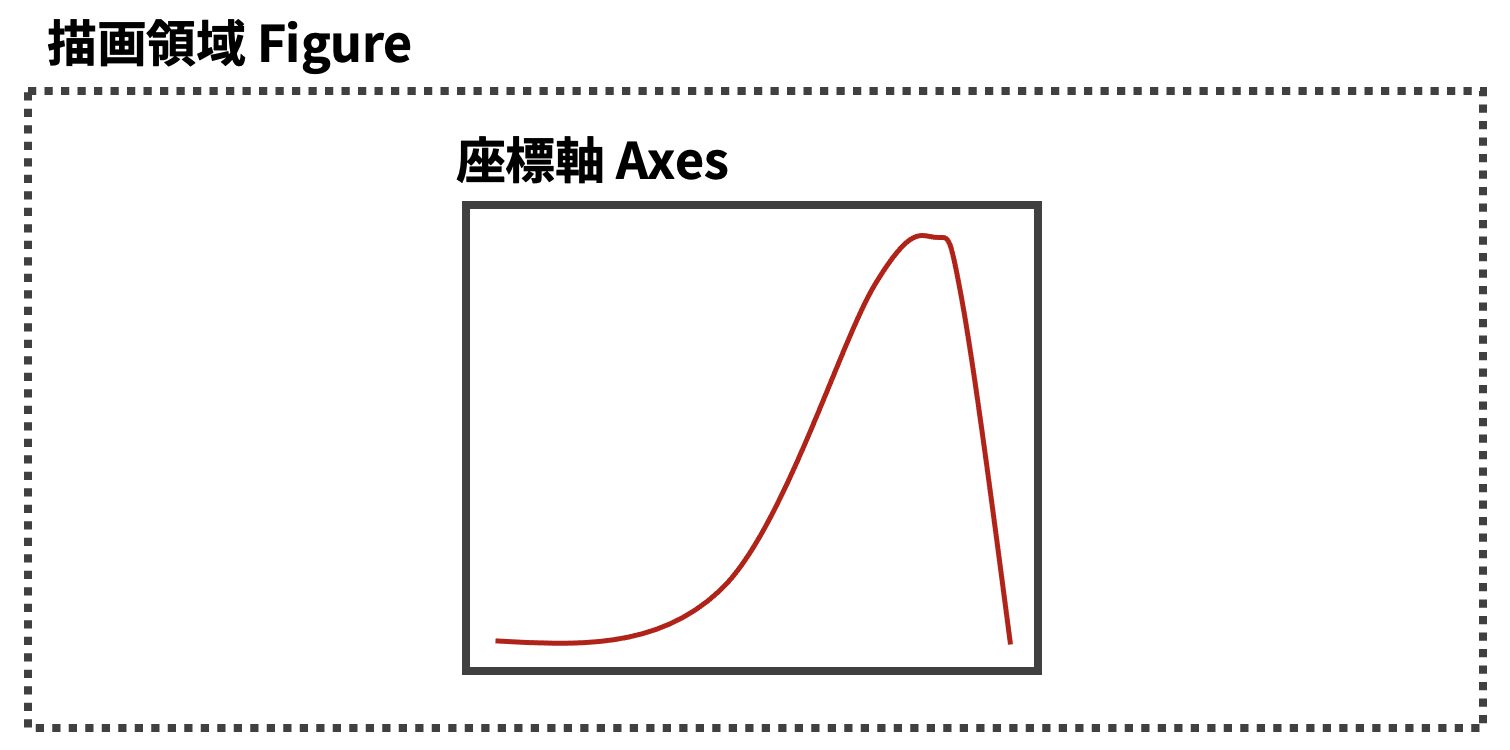

`add_subplot()` メソッドの基本的な引数については以下の通りです。

```
add_subplot(nrows、ncols、index): 
  - nrows: 行（縦）方向の分割数
  - ncols: 列（横）方向の分割数
  - index: 描画位置のインデックス
      (1,2) といったタプルにすることで複数のインデックスにまたがった描画も可能

```
> matplotlib 公式ドキュメント : [matplotlib.pyplot.subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)

実際に以下のコードで指定される座標軸 `Axes` のイメージは次の図のようになります。
```
ax = fig.add_subplot(2, 3, 5)
```

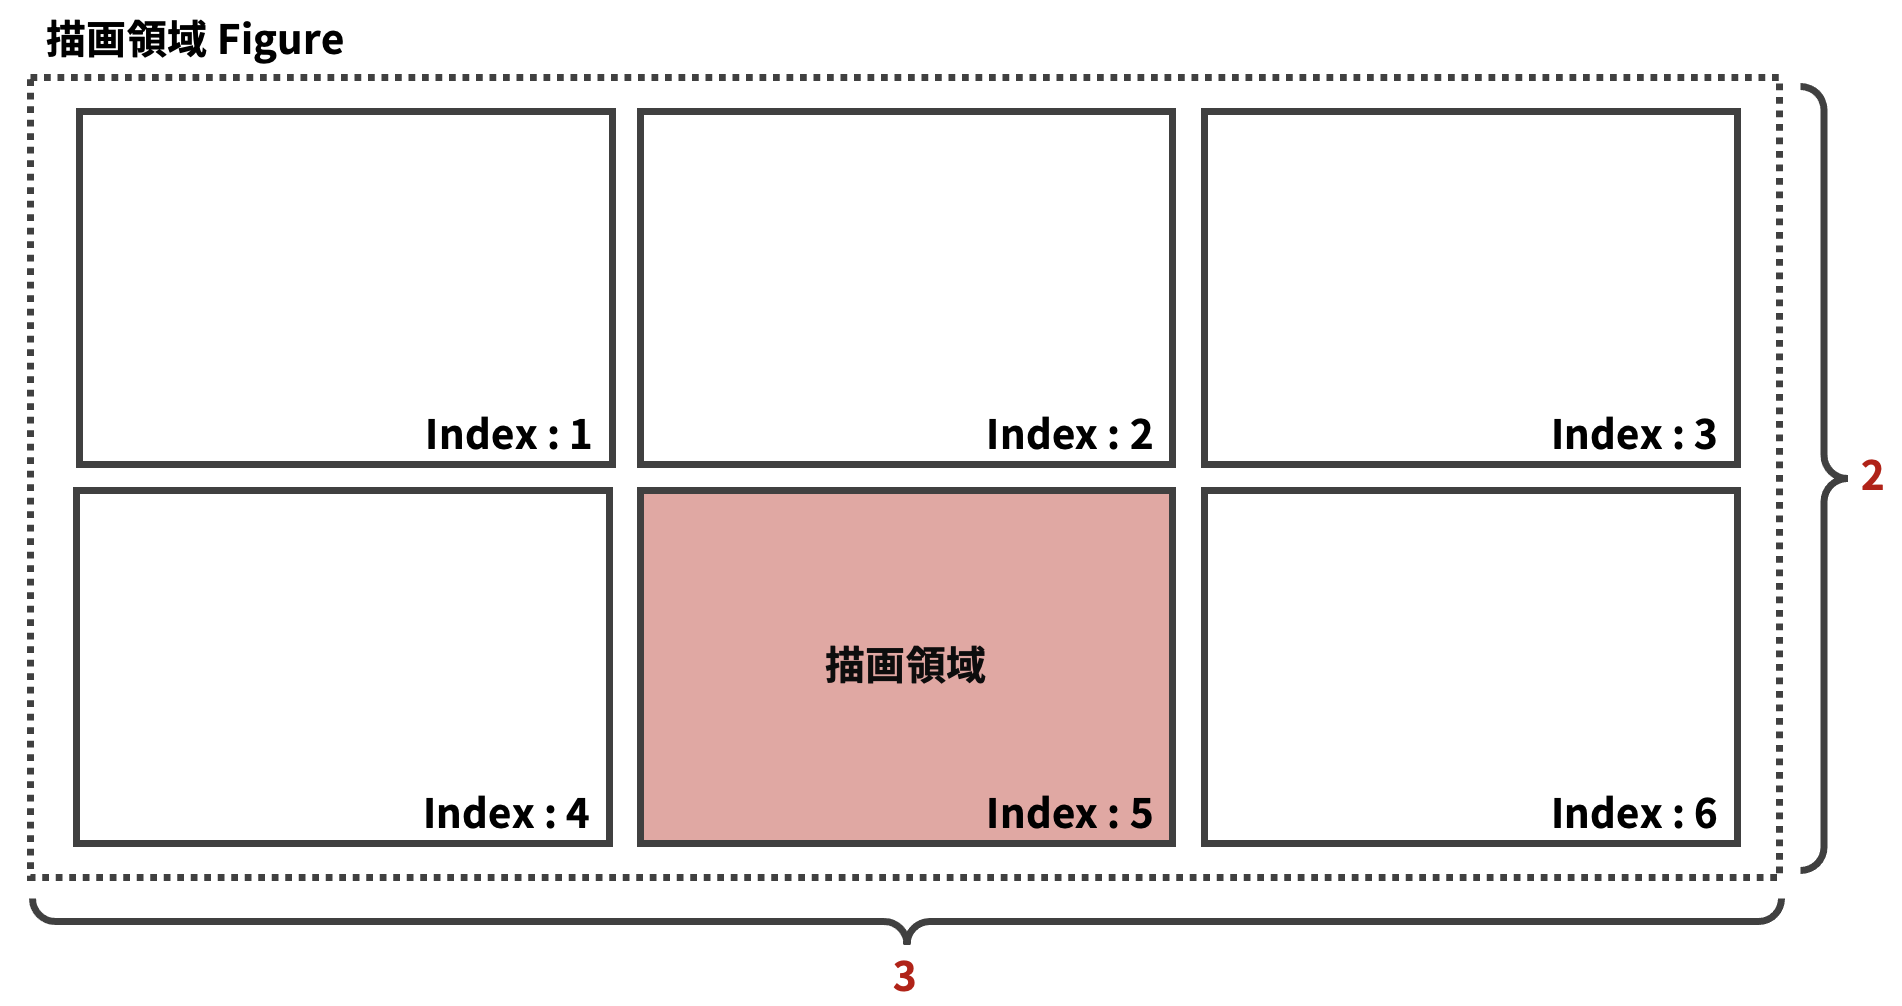

以降は変数 `ax` により指定された位置にグラフがプロットされます。  
凡例やグラフタイトル、軸設定についてもここで行うことができます。

それでは `add_subplot()` を利用して3つのグラフを同時に描画してみましょう。

In [ ]:
# 描画領域の用意


# 【 グラフ1 : 相関の高い項目と低い項目に関する散布図 】
# 描画する座標軸 ax1 を用意

# ax1 へプロット


# 【 グラフ2 : 各都道府県の人口とその男女比 】
# 描画する座標軸 ax2 を用意

# ax2 へプロット


# 【 グラフ3 : 休養時間と仕事時間のヒストグラム 】
# 描画する座標軸 ax3 を用意

# ax3 へプロット


# 表示


(補足)  
「**x 軸ラベルの回転**」の項目では回転のために `.xticks(rotation=90)` を利用しましたが、  
座標軸オブジェクト `ax` はこのメソッドを持たないため `.xaxis.set_tick_params(rotation=90)` で設定しています。

#### **add_axes() を利用する**

`add_axes()` も `add_subplot()` と同じく描画領域内に座標軸 `Axes` を設定するメソッドです。
  
`add_subplot()` では引数として縦横の分割数と描画位置の番号を渡しましたが、  
  `add_axes()` は「**座標軸の矩形のリスト**」を渡す点で大きく異なります。

`add_axes()` メソッドの基本的な引数については以下の通りです。

```
add_axes([left, bottom, width, height]): 
  - left: 矩形の左座標
  - bottom: 矩形の下座標
  - width: 矩形の幅
  - height: 矩形の高さ
```
> matplotlib 公式ドキュメント : [matplotlib.pyplot.figure](https://matplotlib.org/stable/api/figure_api.html) 内に掲載


In [ ]:
# 描画領域の用意

# 【 グラフ1 : 相関の高い項目と低い項目に関する散布図 】
# 描画する座標軸 ax1 を用意

# ax1 へプロット

# 【 グラフ2 : 各都道府県の人口とその男女比 】
# 描画する座標軸 ax2 を用意

# ax2 へプロット

# 【 グラフ3 : 休養時間と仕事時間のヒストグラム 】
# 描画する座標軸 ax3 を用意

# ax3 へプロット


# 表示


## **ploty でインタラクティブな図を作ろう**


マウスのポインターを合わせると図の詳細が見えたりといった、動的な図が作れたら非常に便利です。  
このような図の作成には python ライブラリの1つである **plotly** を使用します。

### **plotly の準備**

まずはインポートを行なって plotly を使用する準備を整えます。


In [ ]:
# インポート


Google Colab で利用する場合は以下のコードのコメントアウトを解除して（行頭の`#`を削除して）実行してください

In [ ]:
#  # colab 上で表示するための設定
# import plotly.io as pio
# pio.renderers.default = "colab"

### **データの準備**

ここからは[独立行政法人統計センター](https://www.nstac.go.jp/use/literacy/ssdse/)が作成・公開している統計データ SSDSE（教育用標準データセット）のうち、  
「47都道府県 × 男女別  × 社会生活119項目」が収録されている**SSDSE-県別推移**データ `SSDSE-B-2022.csv` （以下 SSDSE-B ）を利用します。  

以下のコードにより DataFrame として読み込みます。

In [ ]:
# DataFrame として読み込む


# 確認


このデータのうち、今回は *お住まいの都道府県のデータ* を使用しようと思います。  
[ドキュメント](https://www.nstac.go.jp/sys/files//kaisetsu-B-2022.pdf) を確認し、該当するデータの抽出を行なってみてください。

In [ ]:
# 東京都のデータを抽出する場合


# 確認


### **基本的な使い方**

まずは「*総人口と65歳以上の年推移年齢*」を棒グラフで同時にプロットしてみましょう。

In [ ]:
# 棒グラフ準備

# グラフプロット

# 表示


かなりシンプルなコードですが、2つの棒グラフを綺麗に描画することができました。  
また、マウスを翳すとそのデータの詳細が表示されるインタラクティブなグラフとなっています。

それではレイアウト設定を追加してみましょう。  
`go.Layout()` で設定可能な要素は非常に多く存在します。  
詳細は plotoly 公式ドキュメントの [plotly.graph_objects.Layout](https://plotly.com/python-api-reference/generated/plotly.graph_objects.Layout.html#plotly.graph_objects.Layout) 内をご参照ください。

In [ ]:
# 棒グラフ準備

# レイアウト設定

# グラフプロット


# 表示


それでは、上記のグラフに「 *総人口に占める65歳以上の割合* 」を折れ線グラフで追加してみましょう。

グラフの追加は `data` リスト内に新しくグラフ描画メソッドを追加する操作だけで行うことができます。  
今回は「折れ線グラフ + 棒グラフ」と異なるグラフを同時にプロットしますが、このような場合でも自動で整えて出力してくれます。

ここで1つ注意すべきことがあります。  
総人口に占める65歳以上の割合の縦軸の単位は [`%`] ですが、2本の棒グラフの縦軸の単位は [`人`] となっています。  
すなわち、追加する折れ線グラフは左軸 (`yaxis1`) を参照することができません。  

これを解決するため、2つ目の軸ラベル（右軸）を追加します。

2つ目の軸ラベルは `go.Layout()` オブジェクトの引数 `yaxis2` によって設定することができます。  
その後右軸を参照するグラフ内で引数 `yaxis` に `yaxis2` を渡すことで、該当グラフは右軸を使用することが可能となります。

In [ ]:
# 棒グラフ準備

# レイアウト設定

# グラフプロット

# 表示


### **様々な種類のグラフの描画**



勿論 plotly には棒グラフ以外にも円グラフ、折れ線グラフ、棒グラフ、散布図といった多くのグラフ描画機能が用意されています。  

以下では円グラフを描画していますが、上記に挙げたもの以外にも非常に多くの種類が用意されているため、  
描きたいグラフに合わせて色々調べてみてください。

In [ ]:
# データ整形

# 円グラフ準備

# グラフプロット

# 表示


## **タイタニック問題を考えてみよう**


タイタニック乗客の様々な情報とその生死について記録されたテーブルデータがあります。  
これを基にデータ分析を行ってみましょう。

### **データの準備**

タイタニックデータセットは [Kaggle : Titanic - Machine Learning from Disaster](https://) からダウンロードすることができます。  

その後、以下のコードにより DataFrame として読み込みます。

また、各カラムについては以下の通りです。

* **PassengerId**: 乗客者ID
* **Survived**: 生存状況  （ 0＝死亡、1＝生存 ）
* **Pclass**: 旅客クラス  （ 1＝1等、2＝2等、3＝3等 ）
* **Name**: 乗客名
* **Sex**: 性別
* **Age**: 年齢
* **SibSp**: タイタニック号に同乗している兄弟・配偶者の数
* **Parch**: タイタニック号に同乗している親・子供の数
* **Ticket**: チケット番号
* **Fare**: 旅客運賃
* **Cabin**: 客室番号
* **Embarked**: 出港地  （ C＝Cherbourg、Q＝Queenstown、S＝Southampton ）



### **仮説を立てる**

タイタニックデータセットを観察して仮説を立ててみましょう。  
どんな人が生き残りそうでしょうか？また、どの項目が関係しそうでしょうか？

### **グラフから仮説を検証する**

#### **seaborn の準備**

**seaborn** は python のデータ可視化ライブラリの1つです。  

以下のようにインポートすることで、以降は `sns` で `seaborn` の機能を呼び出すことができます。

In [ ]:
# インポート


#### **棒グラフの作成**


seaborn では関数 `sns.catplot()` によって様々なグラフが作成できます。  
関数 `sns.catplot()` の主な引数については以下の通りです。

```
sns.catplot(data, x, y, hue, kind):
  - x: x軸とするデータ
  - y: y軸とするデータ
  - hue: 指定した項目の次元を追加
  - data: 参照するデータ 
  - kind: グラフの種類の指定
      strip, swarm, box, violin, boxen, point, bar, count が指定可能
```
> seaborn 公式ドキュメント : [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) 

関数 `sns.catplot()` を利用して「 *性別と生存状況について、旅客クラス毎に観察できるような棒グラフ* 」を作成しましょう。

棒グラフを作成するため、引数 `kind=bar` となります。

In [ ]:
# グラフプロット


#### **散布図の作成**

設定を変えてグラフを作成しましょう。  

「 *生存状況と旅客運賃について、旅客クラスごとに観察できるような散布図* 」を作成してみます。  
散布図を作成するため、引数 `kind=strip` となります。

In [ ]:
# グラフプロット


このように seaborn では同じ関数を用いて異なる表現をすることが可能となっています。

#### **要素数による棒グラフの作成**

関数 `countplot()` は単純な要素毎の数を棒グラフで表現します。  

引数 `hue` を設定することで、設定した要素を基準に数を比較することができるため、  
「 *性別毎の人数について旅客クラスを基準に比較する棒グラフ* 」を作成してみましょう。

In [ ]:
# グラフプロット


#### **グラフを利用した検証**

ここまでで学んだグラフのプロット方法を使用して、様々な可能性を検証しましょう。  

試しに、「同乗している親・子供の数」と「生存状況」の関係について調べてみます。


In [ ]:
# グラフプロット

# グラフサイズ変更


ここに「同乗している兄弟・配偶者」も加えてプロットしてみましょう。

In [ ]:
# グラフプロット

# グラフサイズ変更


この3つの要素については特に有意なことは言えそうにありません。

性別や旅客クラスなど、気になる項目間の関連性を自身で調べてみましょう。

#### **ペアプロットによる関係性の可視化**

**ペアプロット**（**散布図行列**）とは、全ての2変数同士の組み合わせに対して散布図を作成し、それを行列のように並べたものです。  
ペアプロットの対角線成分はその変数の分布を示すヒストグラムとなっています。

ペアプロットを利用することで複数の変数の相関関係を視覚的に捉えることが可能です。  

seaborn では関数 `sns.pairplot()` によって作成できます。   
関数 `sns.pairplot()` の主な引数については以下の通りです。

```
sns.pairplot(data, vars, hue, palette, markers, height):
  - data: 参照するデータ 
  - vars: 引数 data 内からペアプロットに利用する変数のリスト
  - hue: 散布図を描画する際に色分けを行う小目
  - palette: 描画の際に使用するカラーセット
  - markers: マーカーのスタイル
  - height: 散布図1つあたりのサイズ [inch]
```
> seaborn 公式ドキュメント : [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn-pairplot) 

実際にペアプロットを描画し、観察してみましょう。

In [ ]:
# グラフプロット


使用する変数を変更したペアプロットも観察してみましょう。

In [ ]:
# グラフプロット


どういった属性を持つ人々の生存率が高かったということができるでしょうか？

# **次節に向けて**

データ分析の章では、データを直接操作したり可視化することについて学びましたが、次節ではいよいよ機械学習に入っていきます。

機械学習とは、ある "知っている情報" → ■ → "知りたい情報" の ■ を作るための方法です。

この章ではデータを可視化して ○○ と ”言えそう” という話をしましたが、機械学習ではその様な特徴を数学やコンピュータの力を使ってモデル(関数)に学習させ、未知のデータについてはどうなのかを定量的に解析していきます。